In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

#Filter out the demo and start programs
df = df.loc[df['demo'] != True]
df = df.loc[df['start'] != True]
df['level'] = pd.to_numeric(df['level'], errors='coerce') #Convert to int and only keep "correct" levels
df = df.loc[df['level'] < 14]

#Remove all code resulting in an error or containing the start or demo programs
df = df.loc[df['server_error'] != "None"]
df = df.loc[df['server_error'] != "-"]

df = df.groupby(['session', 'level'])['code'].count()
df = df.reset_index()
df = df.sort_values(by='code', ascending=False)
df = df.groupby('code')['code'].count()

df = df.reset_index(name="count")
df = df.iloc[2:] #Remove the amount of errors occuring not or once
#df = df.iloc[:-20] #Remove last two because they fuck up the plot

print(df)
print(type(df))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


     code  count
2       2  20528
3       3   8091
4       4   3476
5       5   1771
6       6   1048
..    ...    ...
156   280      1
157   282      1
158   294      1
159   305      1
160   526      1

[159 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


(154, 2)
     code  count
0       2  20528
1       3   8091
2       4   3476
3       5   1771
4       6   1048
..    ...    ...
153   151      0
135   152      2
136   153      1
137   154      1
138   155      1

[154 rows x 2 columns]


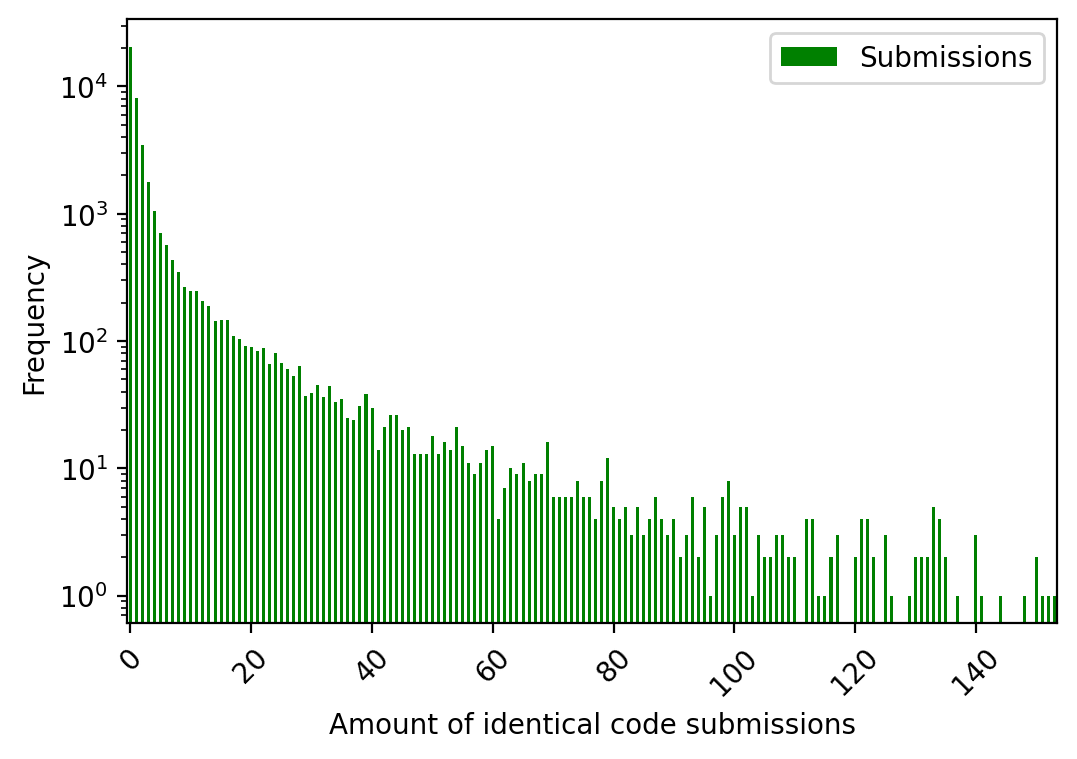

In [110]:
existing = df['code'].tolist()
for i in range(2, 155):
    if i not in existing:
        new_row = {'code': i, 'count': 0}
        df = df.append(new_row, ignore_index=True)

print(df.shape)
df = df.sort_values(by='code')
print(df)

temp = df['code'].tolist() #Insert zero twice to make sure the xticker starts at zero
temp.insert(0, 0)
temp.insert(0, 0)

duplicate_error_plot = df.plot.bar(x='code', y='count', color='green', logy=True)
duplicate_error_plot.set_xlabel("Amount of identical code submissions")
duplicate_error_plot.set_xticks(temp[::20])
duplicate_error_plot.set_xticklabels(temp[::20], rotation=45)
duplicate_error_plot.set_ylabel("Frequency")
duplicate_error_plot.legend(['Submissions'])